In [39]:
import nbformat
def extract_code_cells(notebook_path):
    try:
        with open(notebook_path, 'r', encoding='utf-8') as f:
            notebook = nbformat.read(f, as_version=4)

        code_cells = [
            cell['source'] for cell in notebook['cells'] #if cell['cell_type'] == 'code'
        ]

        return code_cells

    except Exception as e:
        print(f'Error reading notebook: {e}')
        return []    

Extracted Code Cells:
--- Code Cell 1 ---


--- Code Cell 2 ---
# Assignment8 Tree

--- Code Cell 3 ---
## Binary Tree Implementation

--- Code Cell 4 ---
class BinaryTree:
    def __init__(self,key):
        self.key = key
        self.leftChild = None
        self.rightChild = None

    def insertLeft(self,newNode):
        if self.leftChild is None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t

    def insertRight(self,newNode):
        if self.rightChild is None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t

    def getRightChild(self):
        return self.rightChild

    def getLeftChild(self):
        return self.leftChild

    def setNodeValue(self,obj):
        self.key = obj

    def getNodeValue(self):
        return self.ke
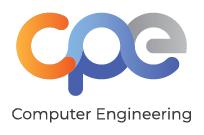
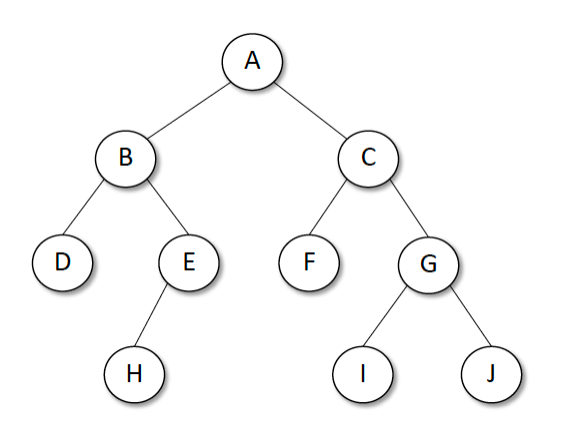
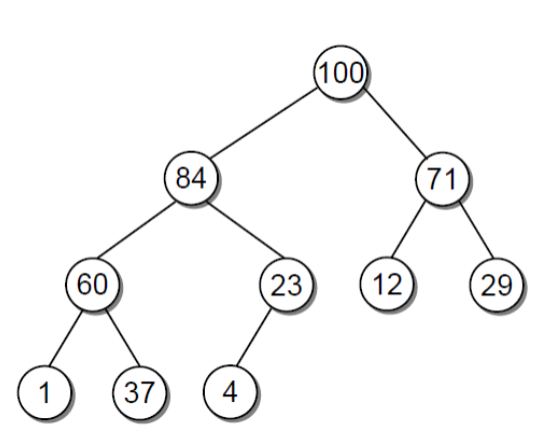

In [40]:
notebook_file = "tests/6009_6015_6017_6009_6015_6017_Assignment8_Tree_Heap.ipynb"
code_cells = extract_code_cells(notebook_file)
print("Extracted Code Cells:")
for i, code in enumerate(code_cells):
    print(f"--- Code Cell {i + 1} ---")
    print(code)
    print()

## Data Preprocessing

In [41]:
len(code_cells)

56

In [42]:
code_cells[2]

'## Binary Tree Implementation'

In [43]:
import ast
import re

In [44]:
def is_valid_python(code):
    """
    Checks if the given code is valid Python syntax.
    
    Parameters:
        code (str): The Python code to validate.
    
    Returns:
        bool: True if the code is valid, False otherwise.
    """
    try:
        ast.parse(code)
        return True
    except (SyntaxError, ValueError):
        return False

def normalize_code(code):
    """
    Normalizes a single code snippet by:
    - Removing comments and docstrings.
    - Stripping redundant whitespace.
    - Flattening the code into a clean structure for further processing.
    
    Parameters:
        code (str): Raw Python code.
    
    Returns:
        str: Normalized code or None if normalization fails.
    """
    try:
        # Parse the code into an AST
        tree = ast.parse(code)
        
        # Convert AST back to normalized code
        normalized_code = ast.unparse(tree)  # Available in Python >=3.9
        
        # Remove inline comments
        normalized_code = re.sub(r'#.*', '', normalized_code)  
        # Flatten whitespace
        normalized_code = re.sub(r'\s+', ' ', normalized_code).strip()

        return normalized_code

    except (SyntaxError, ValueError) as e:
        print(f"SyntaxError or ValueError while normalizing code: {e}")
        return None  # Return None to indicate invalid code

    except Exception as e:
        print(f"Error normalizing code: {e}")
        return None

def preprocess_cell(cell_content):
    """
    Preprocesses a single cell from the notebook.
    Handles Markdown, text, and Python code cells.
    
    Parameters:
        cell_content (str): Content of the cell.
    
    Returns:
        str or None: Preprocessed code if valid, or None if the cell is not valid Python code.
    """
    # Clean Markdown syntax and headings
    cleaned_content = re.sub(r'#+', '', cell_content)  # Remove Markdown headers (e.g., "##")
    cleaned_content = re.sub(r'\*\*|\*|-', '', cleaned_content)  # Remove Markdown list symbols
    cleaned_content = cleaned_content.strip()

    # Check if the cleaned content is valid Python code
    if is_valid_python(cleaned_content):
        return normalize_code(cleaned_content)
    else:
        print(f"Skipping cell: Not valid Python code or markdown detected.")
        return None

def preprocess_code_cells(raw_cells):
    """
    Processes a list of cells, handling Markdown, text, and code cells.
    
    Parameters:
        raw_cells (list): List of raw cell contents (strings).
    
    Returns:
        list: List of preprocessed Python code strings.
    """
    preprocessed_cells = []
    for i, cell_content in enumerate(raw_cells):
        print(f"Processing Cell {i + 1}...")
        preprocessed_code = preprocess_cell(cell_content)
        if preprocessed_code:
            preprocessed_cells.append(preprocessed_code)

    return preprocessed_cells

In [45]:
# Preprocess the cells
preprocessed_code_cells = preprocess_code_cells(code_cells)

print("\nPreprocessed Code Cells:")
for i, code in enumerate(preprocessed_code_cells):
    print(f"--- Code Cell {i + 1} ---")
    print(code)

Processing Cell 1...
Skipping cell: Not valid Python code or markdown detected.
Processing Cell 2...
Skipping cell: Not valid Python code or markdown detected.
Processing Cell 3...
Skipping cell: Not valid Python code or markdown detected.
Processing Cell 4...
Processing Cell 5...
Skipping cell: Not valid Python code or markdown detected.
Processing Cell 6...
Processing Cell 7...
Processing Cell 8...
Processing Cell 9...
Processing Cell 10...
Processing Cell 11...
Processing Cell 12...
Processing Cell 13...
Processing Cell 14...
Processing Cell 15...
Skipping cell: Not valid Python code or markdown detected.
Processing Cell 16...
Skipping cell: Not valid Python code or markdown detected.
Processing Cell 17...
Skipping cell: Not valid Python code or markdown detected.
Processing Cell 18...
Processing Cell 19...
Processing Cell 20...
Processing Cell 21...
Processing Cell 22...
Processing Cell 23...
Processing Cell 24...
Processing Cell 25...
Skipping cell: Not valid Python code or markdo

In [46]:
len(preprocessed_code_cells)

39

In [47]:
preprocessed_code_cells[0]

'class BinaryTree: def __init__(self, key): self.key = key self.leftChild = None self.rightChild = None def insertLeft(self, newNode): if self.leftChild is None: self.leftChild = BinaryTree(newNode) else: t = BinaryTree(newNode) t.leftChild = self.leftChild self.leftChild = t def insertRight(self, newNode): if self.rightChild is None: self.rightChild = BinaryTree(newNode) else: t = BinaryTree(newNode) t.rightChild = self.rightChild self.rightChild = t def getRightChild(self): return self.rightChild def getLeftChild(self): return self.leftChild def setNodeValue(self, obj): self.key = obj def getNodeValue(self): return self.key def preorder(self): print(self.key) if self.leftChild: self.leftChild.preorder() if self.rightChild: self.rightChild.preorder() def postorder(self): if self.leftChild: self.leftChild.postorder() if self.rightChild: self.rightChild.postorder() print(self.key) def inorder(self): if self.leftChild: self.leftChild.inorder() print(self.key) if self.rightChild: self.rig

In [48]:
print(preprocessed_code_cells)

['class BinaryTree: def __init__(self, key): self.key = key self.leftChild = None self.rightChild = None def insertLeft(self, newNode): if self.leftChild is None: self.leftChild = BinaryTree(newNode) else: t = BinaryTree(newNode) t.leftChild = self.leftChild self.leftChild = t def insertRight(self, newNode): if self.rightChild is None: self.rightChild = BinaryTree(newNode) else: t = BinaryTree(newNode) t.rightChild = self.rightChild self.rightChild = t def getRightChild(self): return self.rightChild def getLeftChild(self): return self.leftChild def setNodeValue(self, obj): self.key = obj def getNodeValue(self): return self.key def preorder(self): print(self.key) if self.leftChild: self.leftChild.preorder() if self.rightChild: self.rightChild.preorder() def postorder(self): if self.leftChild: self.leftChild.postorder() if self.rightChild: self.rightChild.postorder() print(self.key) def inorder(self): if self.leftChild: self.leftChild.inorder() print(self.key) if self.rightChild: self.ri